<a href="https://colab.research.google.com/github/sbjunaid/AI-based-voice-assistant/blob/main/fmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clothing Outfit Detection** 

In [1]:
import tensorflow as tf #importing tensorflow

In [2]:
fmnist = tf.keras.datasets.fashion_mnist #loading the dataset

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data() #dividing the training set and testing set

4431872/4422102 [==============================] - 0s 0us/step


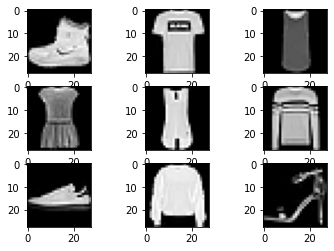

In [4]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(training_images[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [5]:
training_images  = training_images / 255.0    # Normalize pixel values to be between 0 and 1
test_images = test_images / 255.0


In [6]:
#creating the model
model = tf.keras.models.Sequential([                                   
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

    
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation=tf.nn.relu),                                 
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
#compilation and training of model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4656 - accuracy: 0.8300
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3155 - accuracy: 0.8835
Epoch 3/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2726 - accuracy: 0.8994
Epoch 4/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2423 - accuracy: 0.9092
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2169 - accuracy: 0.9186


In [8]:
# evaluation of model to see the performance with testing set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2527 - accuracy: 0.9062


[0.25273627042770386, 0.9061999917030334]

In [9]:
model.summary()  # here you can see the dimensions of image changing after applying 2 sets of convolution pooling layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
# save model
model.save('final_model.h5')

ankle_boots


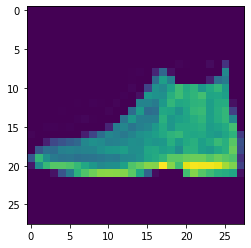

In [17]:
import numpy as np
import matplotlib.pyplot as plt
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(test_images[:1])
label = labels[np.argmax(predictions)]
 
print(label)
plt.imshow(test_images[:1][0])
plt.show()

NameError: ignored